In [ ]:

import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split
import numpy as np


In [ ]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

Using downloaded and verified file: ./cifar10.tgz


In [ ]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

In [ ]:
data_dir='./data/cifar10'
os.listdir(data_dir)

['test', 'train']

In [ ]:
classes=os.listdir(data_dir+'/train')

In [ ]:
classes

['ship',
 'truck',
 'dog',
 'airplane',
 'bird',
 'horse',
 'frog',
 'deer',
 'automobile',
 'cat']

In [ ]:
from torchvision.datasets import  ImageFolder
from torchvision.transforms import ToTensor

In [ ]:
dataset=ImageFolder(data_dir+'/train',transform=ToTensor())

In [ ]:
for img,label in dataset:
  print(img,label)
  break

tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [ ]:
img,label = dataset[0]
print(img,label,img.shape)


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [ ]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
 
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'
def show_example(img,label):
  print('class : ',dataset.classes[label],str(label))
  plt.imshow(img.permute(1,2,0))

class :  airplane 0


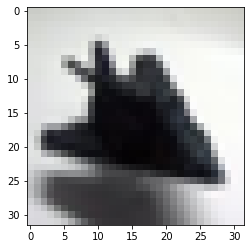

In [ ]:
show_example(*dataset[0])

## Train & valid split

In [ ]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)


(45000, 5000)

In [ ]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [ ]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=2, pin_memory=True)

In [ ]:
from torchvision.utils import make_grid


In [ ]:
def show_batch(dl):
  for images,labels in dl:
    fig,ax=plt.subplots(figsize=(12,12))
    ax.set_xticks([]);ax.set_yticks([])
    ax.imshow(make_grid(images,10).permute(1,2,0))
    break

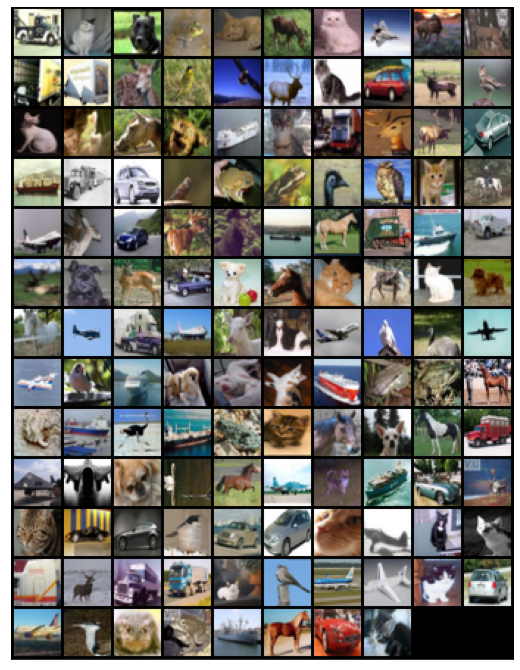

In [ ]:
show_batch(train_dl)

In [ ]:
def apply_kernel(image,kernel):
  ri,ci=image.shape
  rk,ck=kernel.shape
  ro,co=ri-rk+1,ci-ck+1
  output=torch.zeros([ro,co])
  for i in range(ro):
    for j in range(co):
      output[i,j]=torch.sum(image[i:i+rk,j:j+ck]*kernel)
  
  return output

In [ ]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

# Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
simple_model= nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.MaxPool2d(2,2)

)

In [ ]:
for images,labels in train_dl:
  print(images.shape , labels.shape)
  output=simple_model(images)
  print(output.shape)
  break

torch.Size([128, 3, 32, 32]) torch.Size([128])
torch.Size([128, 8, 16, 16])


In [ ]:
print(simple_model)

Sequential(
  (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [ ]:
# Simple model to test the code
model= nn.Sequential(
    nn.Conv2d(3,8,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Conv2d(8,16,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),


    nn.Conv2d(16,32,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),


    nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),


    nn.Conv2d(64,32,kernel_size=3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),

    nn.Flatten(),
    nn.Linear(32,10)
)

In [ ]:
for images,labels in train_dl:
  print(images.shape , labels.shape)
  output=model(images)
  print(output.shape)
  break

torch.Size([128, 3, 32, 32]) torch.Size([128])
torch.Size([128, 10])


In [ ]:
output[0]

tensor([ 0.1028, -0.0811,  0.1693,  0.0124, -0.0768, -0.0572,  0.0628,  0.0981,
        -0.1056,  0.0946], grad_fn=<SelectBackward>)

In [ ]:
probs=F.softmax(output[0],dim=0)
probs

tensor([0.1080, 0.0898, 0.1154, 0.0986, 0.0902, 0.0920, 0.1037, 0.1075, 0.0877,
        0.1071], grad_fn=<SoftmaxBackward>)

In [ ]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
labels[0]

tensor(1)

In [ ]:
dataset.classes[labels[0]]

'automobile'

In [ ]:
dataset.classes[5]

'dog'

class :  automobile tensor(1)


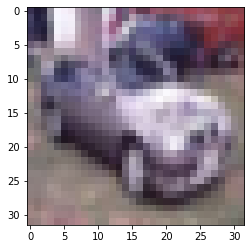

In [ ]:
show_example(images[0],labels[0])

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [ ]:
device = get_default_device()
device

device(type='cuda')

In [ ]:
def to_device(data,device):
  if isinstance(data,(list,tuple)):
    return[to_device(x,device) for x in data]
  return data.to(device,non_blocking=True)

In [ ]:
class DeviceDataLoader():
  def __init__(self,dl,device):
    self.dl=dl
    self.device=device
  
  def __iter__(self):
    for b in self.dl:
      yield to_device(b,self.device)

  def __len__(self):
    return len(self.dl)

In [ ]:
class Cifar10(nn.Module):
  def __init__(self):
    super().__init__()
    self.network=nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), #32->16

        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(128,128,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 16->8,


        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.Conv2d(256,256,kernel_size=3,stride=1,padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2,2), # 8->4,

        nn.Flatten(),
        nn.Linear(4096,1024),
        nn.ReLU(),
        nn.Linear(1024,512),
        nn.ReLU(),
        nn.Linear(512,10)
        
    )

  def forward(self,xb):
    return self.network(xb)
    


In [ ]:
train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(val_dl,device)
model=Cifar10()
to_device(model,device)

Cifar10(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=102

In [ ]:
device

device(type='cuda')

# Training 

In [ ]:
def loss_batch(model,loss_func,xb,yb,opt=None,metric=None):

  preds=model(xb)
  loss=loss_func(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()
  metric_result=None
  if metric is not None:
    metric_result=metric(preds,yb)
  return loss.item(),len(xb),metric_result

In [1]:
def evaluate(model,loss_func,valid_dl,metric=None):
  with torch.no_grad():
    results=[loss_batch(model,loss_func,xb,yb,metric=metric) for xb,yb in valid_dl]

    losses,nums,metrics=zip(*results)
    total=np.sum(nums)
    avg_loss=np.sum(np.multiply(losses,nums)) / total
    if metric is not None:
      avg_metric=np.sum(np.multiply(metrics,nums)) / total
    return avg_loss,total,avg_metric

In [2]:
def accuracy(outputs,labels):
  _,preds=torch.max(outputs,dim=1)

  return torch.sum(preds==labels).item()/ len(preds)



In [3]:
def fit (epochs,lr, model,loss_fn,train_dl,valid_dl,metric=None,opt_fn=None):
  train_losses,val_losses,val_metrics=[],[],[]
  if opt_fn is None : opt_fn=torch.optim.SGD
  opt=opt_fn(model.parameters(),lr=lr)

  for epoch in range(0,epochs):
    #train
    model.train()
    for xb,yb in train_dl:
      train_loss,_,_=loss_batch(model,loss_fn,xb,yb,opt)
    #evaluate
    model.eval()
    result=evaluate(model,loss_fn,valid_dl,metric)
    val_loss,total,val_metric=result

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_metrics.append(val_metric)
    #progress
    if metric is None:
      print("Epoch : [{}/{}], Train Loss : {:.4f},Validation Loss : {:.4}".format(epoch+1,epochs,train_loss,val_loss))
    else:
      print("Epoch : [{}/{}], Train Loss : {:.4f}, Validation Loss : {:.4}, {} : {:.4f}".format(epoch+1,epochs,train_loss,val_loss,metric.__name__,val_metric))
  return  train_losses,val_losses, val_metrics


In [ ]:
next(model.parameters()).device

device(type='cuda', index=0)

In [ ]:
print(model)

Cifar10(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=102

In [ ]:
 val_loss,total, val_acc= evaluate(model,F.cross_entropy,valid_dl,metric=accuracy)
 print("Loss : {:.4f}, Accuracy : {: .4f}".format(val_loss,val_acc))

Loss : 2.3025, Accuracy :  0.1030


In [ ]:
for xb,yb in train_dl:
  print(xb.get_device())
  break

0


In [ ]:
epochs=10
lr=0.001
opt=torch.optim.Adam

In [ ]:
history=fit(epochs,lr,model,F.cross_entropy,train_dl,valid_dl,accuracy,opt)
train_losses1, val_losses1,val_metrics1=history

Epoch : [1/10], Train Loss : 1.5998, Validation Loss : 1.482, accuracy : 0.4538
Epoch : [2/10], Train Loss : 1.1793, Validation Loss : 1.15, accuracy : 0.5866
Epoch : [3/10], Train Loss : 1.0077, Validation Loss : 1.048, accuracy : 0.6280
Epoch : [4/10], Train Loss : 1.0029, Validation Loss : 0.8841, accuracy : 0.6932
Epoch : [5/10], Train Loss : 0.5204, Validation Loss : 0.8495, accuracy : 0.7096
Epoch : [6/10], Train Loss : 0.6169, Validation Loss : 0.7847, accuracy : 0.7438
Epoch : [7/10], Train Loss : 0.6136, Validation Loss : 0.7621, accuracy : 0.7514
Epoch : [8/10], Train Loss : 0.2950, Validation Loss : 0.8089, accuracy : 0.7592
Epoch : [9/10], Train Loss : 0.3738, Validation Loss : 0.9736, accuracy : 0.7372
Epoch : [10/10], Train Loss : 0.3212, Validation Loss : 0.9585, accuracy : 0.7648


In [ ]:
history=fit(10,0.00001,model,F.cross_entropy,train_dl,valid_dl,accuracy,opt)
train_losses2,val_losses2,val_metrics2=history

Epoch : [1/10], Train Loss : 0.1106, Validation Loss : 0.965, accuracy : 0.7754
Epoch : [2/10], Train Loss : 0.0243, Validation Loss : 0.9966, accuracy : 0.7772
Epoch : [3/10], Train Loss : 0.0315, Validation Loss : 1.032, accuracy : 0.7796
Epoch : [4/10], Train Loss : 0.0411, Validation Loss : 1.063, accuracy : 0.7812
Epoch : [5/10], Train Loss : 0.0326, Validation Loss : 1.096, accuracy : 0.7834
Epoch : [6/10], Train Loss : 0.0161, Validation Loss : 1.126, accuracy : 0.7840
Epoch : [7/10], Train Loss : 0.0578, Validation Loss : 1.159, accuracy : 0.7838
Epoch : [8/10], Train Loss : 0.0126, Validation Loss : 1.191, accuracy : 0.7854
Epoch : [9/10], Train Loss : 0.0308, Validation Loss : 1.224, accuracy : 0.7854
Epoch : [10/10], Train Loss : 0.0082, Validation Loss : 1.254, accuracy : 0.7850


In [ ]:
device

device(type='cuda')

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
print(model)

Cifar10(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_features=102

In [ ]:
accuracies=[val_acc]+val_metrics1+val_metrics2
train_losses=train_losses1+train_losses2
val_losses=val_losses1+val_losses2

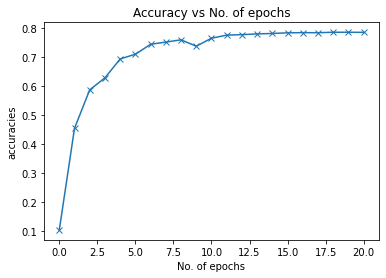

In [ ]:
plt.plot(accuracies,"-x")
plt.xlabel('No. of epochs')
plt.ylabel("accuracies")
plt.title("Accuracy vs No. of epochs");

In [ ]:
def plot_losses(train_losses,val_losses):
  plt.plot(train_losses,"-x")
  plt.plot(val_losses,"-o")
  plt.xlabel('No. of epochs')
  plt.ylabel("Losses")
  plt.legend(['Training','Validation'])

  plt.title("Losses vs No. of epochs");




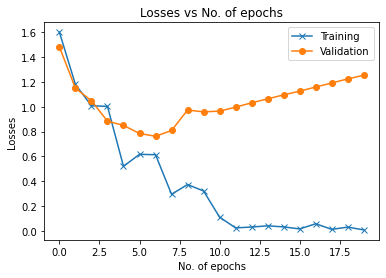

In [ ]:
plot_losses(train_losses,val_losses)

In [ ]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())


In [ ]:

def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


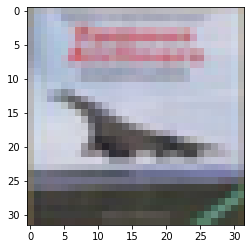

In [ ]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model,F.cross_entropy,test_loader,accuracy)
result

(1.250402948665619, 10000, 0.7734)